<a href="https://colab.research.google.com/github/amirgarsha/ML_course_maktab/blob/main/Mini_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project4 - Clustering</h3>
</div>

<img src = "https://miro.medium.com/max/5760/1*_SRbz8535-CxPzo6IL9pBA.png" width=80%>

## Importing the libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler  


In [22]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

## Load and Prepare Data

In [3]:
df_customer = pd.read_csv("Mall_Customers.csv")
df_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA

In [4]:
print(df_customer.columns.values)
print(df_customer.shape)

['CustomerID' 'Gender' 'Age' 'Annual Income (k$)' 'Spending Score (1-100)']
(200, 5)


In [5]:
df_customer.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [6]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df_customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Preprocessing

In [8]:
##finding null value
print(df_customer.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:
##change categorical value
df_customer_prc = df_customer.replace(['Male','Female'],[0,1])
df_customer_prc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [10]:
## standardization
sc = StandardScaler()
df_customer_prc[["Age","Annual Income (k$)","Spending Score (1-100)"]] = sc.fit_transform(df_customer_prc[["Age","Annual Income (k$)","Spending Score (1-100)"]])
df_customer_prc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,-1.424569,-1.738999,-0.434801
1,2,0,-1.281035,-1.738999,1.195704
2,3,1,-1.352802,-1.700830,-1.715913
3,4,1,-1.137502,-1.700830,1.040418
4,5,1,-0.563369,-1.662660,-0.395980


## Strorytelling - Visualization

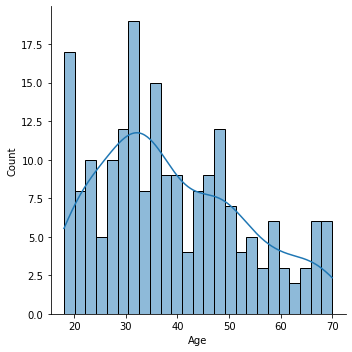

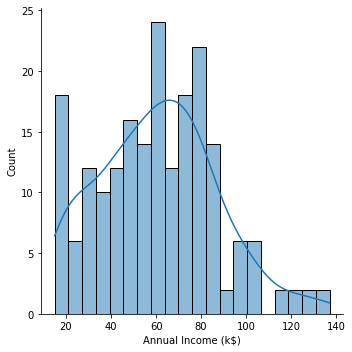

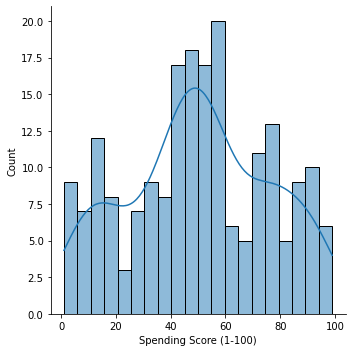

In [11]:
sns.displot(df_customer["Age"],kde=True,bins=25)

sns.displot(df_customer["Annual Income (k$)"],kde=True,bins=20)

sns.displot(df_customer["Spending Score (1-100)"],kde=True,bins=20)

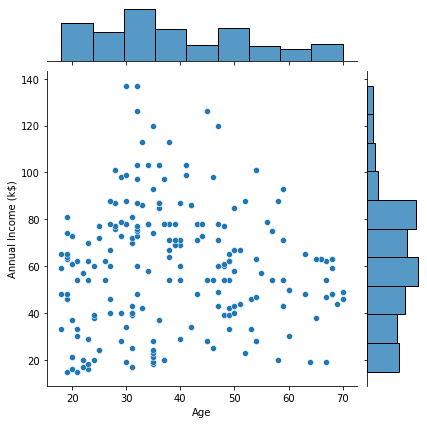

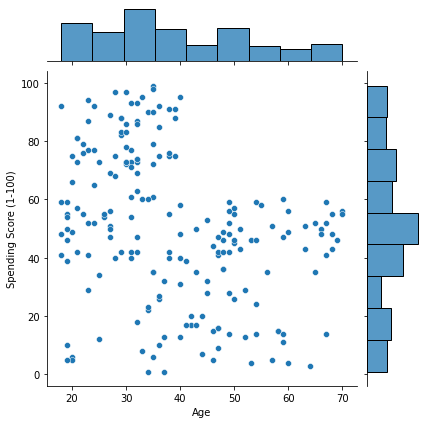

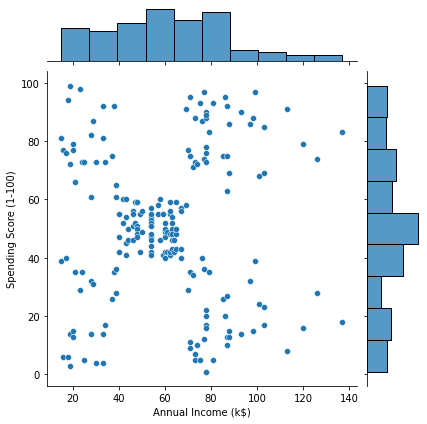

In [12]:
sns.jointplot(x='Age', y='Annual Income (k$)', data=df_customer)
sns.jointplot(x='Age', y='Spending Score (1-100)', data=df_customer)
sns.jointplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_customer)

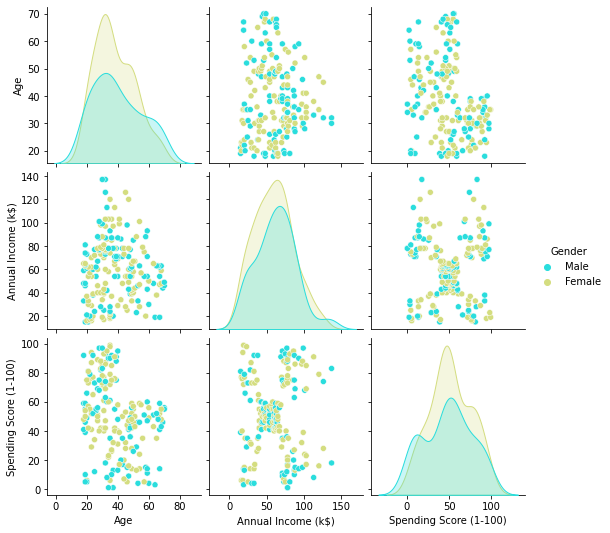

In [13]:
sns.pairplot(df_customer[["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]], hue='Gender',palette='rainbow')

## Trani the Model (Clustering)

**Using all features for clustering**

In [ ]:
X = df_customer_prc.iloc[:, 1:5].values

In [ ]:
## Kmeans
## finding best k with elbow method
wcss = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init = 'k-means++', random_state = 42)
    kmeanModel.fit(X)
    wcss.append(kmeanModel.inertia_)

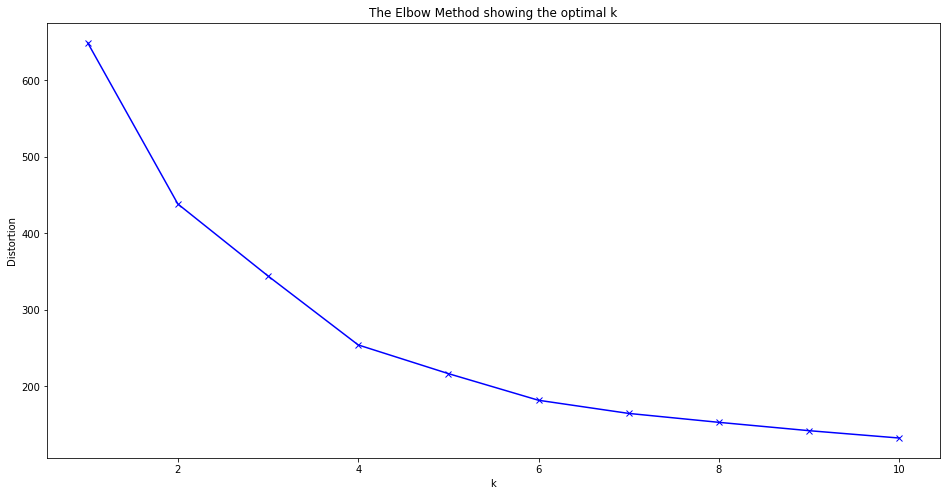

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeansModel = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans= kmeansModel.fit_predict(X)

In [ ]:
kmeansModel.cluster_centers_

array([[ 0.59090909, -0.97439592, -1.32954532,  1.13217788],
       [ 0.56896552,  1.19862745, -0.46098141, -0.32703818],
       [ 0.41176471,  0.17329545,  1.06645385, -1.2980103 ],
       [ 0.65957447, -0.78172248, -0.40306917, -0.21591396],
       [ 0.53846154, -0.44191719,  0.99158305,  1.23950275]])

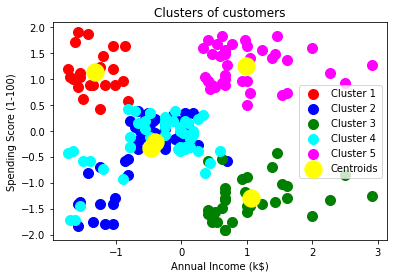

In [ ]:
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 2], X[y_kmeans == 3, 3], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 2], X[y_kmeans == 4, 3], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansModel.cluster_centers_[:, 2], kmeansModel.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

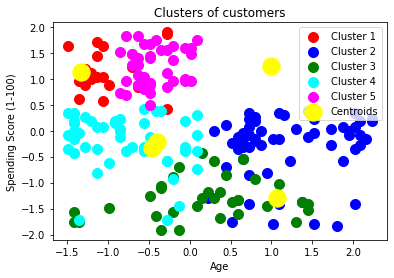

In [ ]:
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, 3], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 1], X[y_kmeans == 4, 3], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansModel.cluster_centers_[:, 2], kmeansModel.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Using Age, Annual income and Spending Score for clustring**

In [ ]:
X = df_customer_prc.iloc[:, 2:5].values

In [ ]:
## Kmeans
## finding best k with elbow method
wcss = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init = 'k-means++', random_state = 42)
    kmeanModel.fit(X)
    wcss.append(kmeanModel.inertia_)

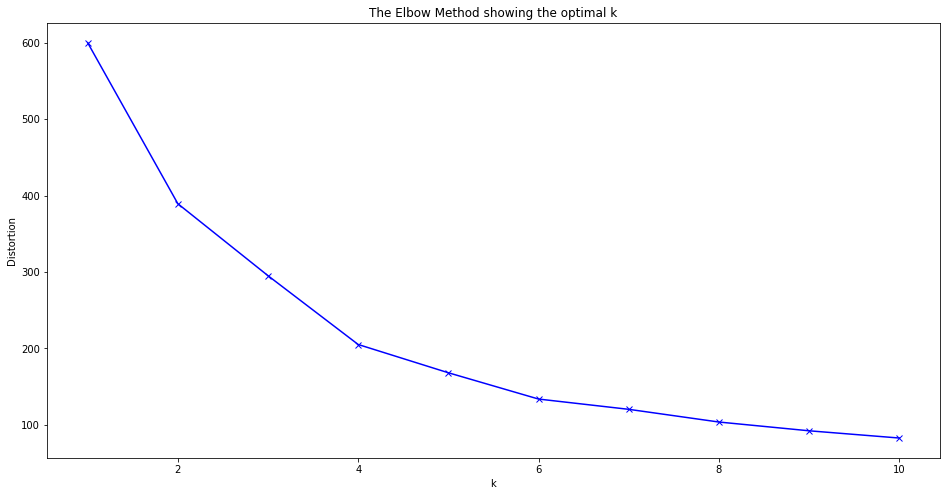

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeansModel = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans= kmeansModel.fit_predict(X)

In [ ]:
kmeansModel.cluster_centers_

array([[ 1.20484056, -0.23577338, -0.05236781],
       [-0.42880597,  0.97484722,  1.21608539],
       [-0.98067852, -0.74305983,  0.46744035],
       [ 0.5310735 , -1.2905084 , -1.23646671],
       [ 0.07333084,  0.97494509, -1.19729675]])

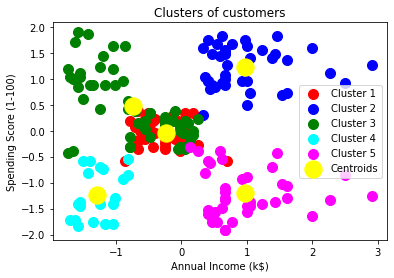

In [ ]:
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansModel.cluster_centers_[:, 1], kmeansModel.cluster_centers_[:, 2], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Using Annual Income and Spending Score for clustering**

In [ ]:
X = df_customer_prc.iloc[:, 3:5].values

In [ ]:
## Kmeans
## finding best k with elbow method
wcss = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init = 'k-means++', random_state = 42)
    kmeanModel.fit(X)
    wcss.append(kmeanModel.inertia_)

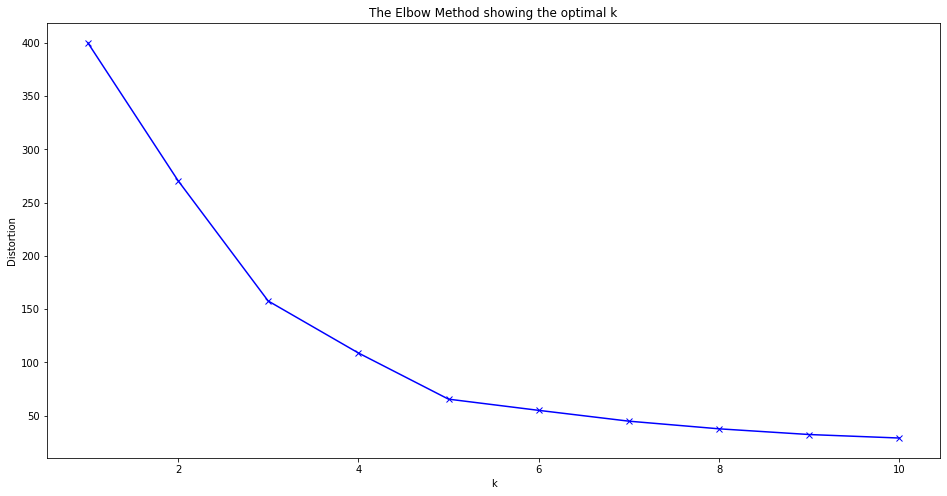

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeansModel = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans= kmeansModel.fit_predict(X)

In [ ]:
kmeansModel.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788],
       [ 0.99158305,  1.23950275]])

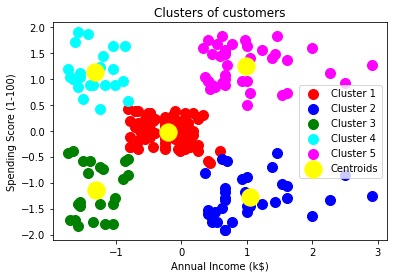

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansModel.cluster_centers_[:, 0], kmeansModel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Using original data (without standardization)**

In [16]:
X = df_customer.iloc[:, 3:5].values

In [17]:
## Kmeans
## finding best k with elbow method
wcss = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init = 'k-means++', random_state = 42)
    kmeanModel.fit(X)
    wcss.append(kmeanModel.inertia_)

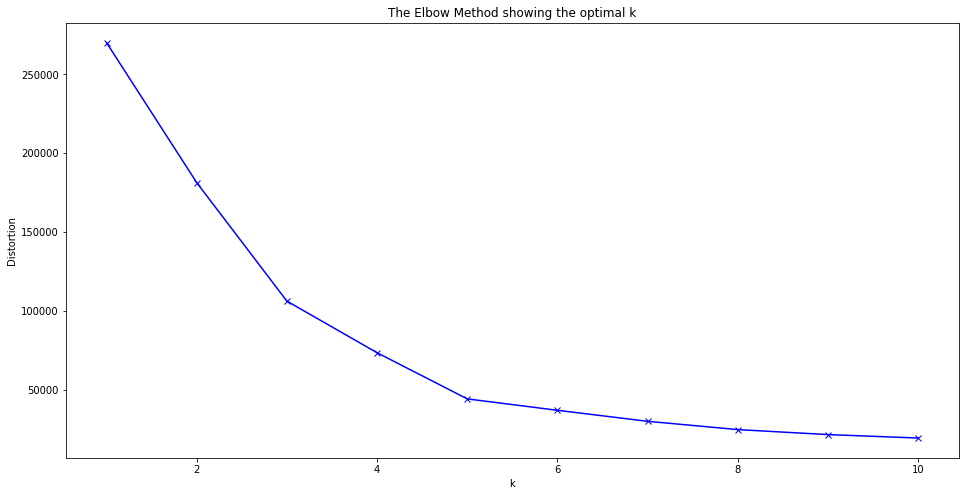

In [18]:
plt.figure(figsize=(16,8))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [19]:
kmeansModel = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans= kmeansModel.fit_predict(X)

In [20]:
kmeansModel.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

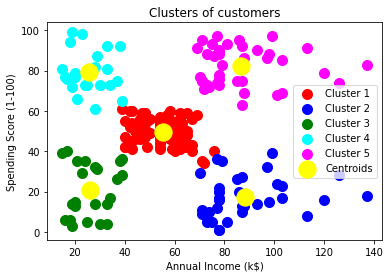

In [21]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansModel.cluster_centers_[:, 0], kmeansModel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**DBSCAN**

In [53]:
X = df_customer_prc.iloc[:, 3:5].values

In [56]:
clustering = DBSCAN(eps=0.4, min_samples=10).fit(X)
y_dbscan = clustering.labels_

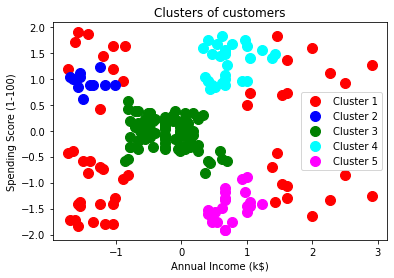

In [57]:
plt.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_dbscan == 0, 0], X[y_dbscan == 0, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_dbscan == 1, 0], X[y_dbscan == 1, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_dbscan == 2, 0], X[y_dbscan == 2, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_dbscan == 3, 0], X[y_dbscan == 3, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(kmeansModel.cluster_centers_[:, 0], kmeansModel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [39]:
X = df_customer.iloc[:, 3:5].values

In [48]:
clustering = DBSCAN(eps=10, min_samples=10).fit(X)
y_dbscan = clustering.labels_
y_dbscan

array([-1, -1, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2,  1,  2,  1,  2,  3,  2,  3,  2,  1,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  1,  2,  3,  2,  1,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  1,  2,  3,  2,  3,  2,  3,  2,  3, -1,
        3,  2,  3,  2,  3,  2,  3, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

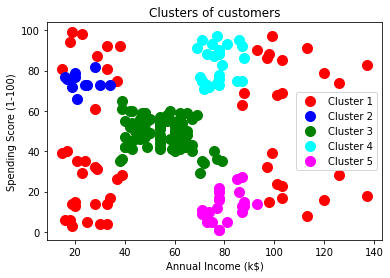

In [49]:
plt.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_dbscan == 0, 0], X[y_dbscan == 0, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_dbscan == 1, 0], X[y_dbscan == 1, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_dbscan == 2, 0], X[y_dbscan == 2, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_dbscan == 3, 0], X[y_dbscan == 3, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(kmeansModel.cluster_centers_[:, 0], kmeansModel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()